In [11]:
import pandas as pd
import numpy as np
from math import isnan
import matplotlib.pyplot as plt

In [3]:
df_rating = pd.read_csv("ratings.csv")
df_movie = pd.read_csv("movies.csv")
df = pd.merge(df_movie, df_rating)
df.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616


In [ ]:
timestamp = df_rating.groupby(['timestamp'])
timestamp.plot.hist()
plt.title('Ditribution of timestamp')
plt.show()

/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


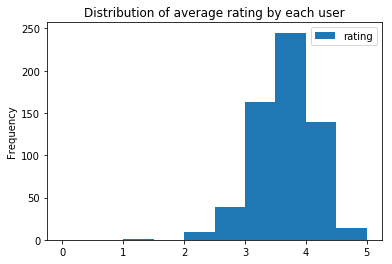

In [3]:
rating_user = df_rating.groupby(['userId'])[['rating']].mean()
rating_user.plot.hist(range=(0,5))
plt.title('Distribution of average rating by each user')
plt.show()

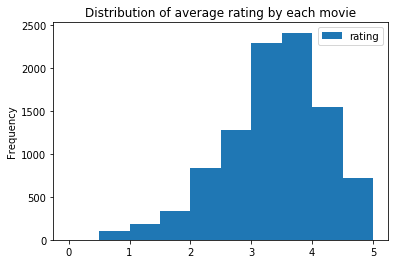

In [4]:
rating_movie = df_rating.groupby(['movieId'])[['rating']].mean()
rating_movie.plot.hist(range=(0, 5))
plt.title('Distribution of average rating by each movie')
plt.show()

In [8]:
df_pivot = df.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
df_new = df_pivot.fillna(0)

In [15]:
def cos_sim(a, b):
    """Takes 2 vectors a, b and returns the cosine similarity according
    to the definition of the dot product
    """
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b) 

In [7]:
cos_sim(df_new.loc[1], df_new.loc[3])

0.05972026184426368

In [8]:
def pearson(x, y):
    return cos_sim(x - np.mean(x), x - np.mean(y))

In [9]:
pearson(df_new.loc[1], df_new.loc[3])

0.9904302049568393

In [10]:
def retro_dictify(frame):
    d = {}
    for row in frame.values:
        here = d
        for elem in row[:-2]:
            if elem not in here:
                here[elem] = {}
            here = here[elem]
        here[row[-2]] = row[-1]
    return d

In [9]:
data_dict = df_pivot.to_dict('index')

In [12]:
# functional
data_clean_dict = filter(lambda k: not isnan(data_dict[k]), data_dict)

# dict comprehension
data_clean_dict = {i: {k: data_dict[i][k] for k in data_dict[i] if not isnan(data_dict[i][k])} for i in data_dict} 

In [13]:
def dict_pearson_score(user1, user2):
    if len(user1) == 0 or len(user2) == 0:
        return 0
    
    key_set = set(user1.keys()) & set(user2.keys())
    user1_list = [user1[a] for a in key_set]
    user2_list = [user2[b] for b in key_set]
    
    return cos_sim(user1_list - np.mean(user1_list), user2_list - np.mean(user2_list))

In [53]:
dict_pearson_score(data_clean_dict[1], data_clean_dict[3])

0.0798188571017626

In [17]:
def recommend(data, person, distance_function, threshold):
    weighted_score = {}
    weights = {}
    for id_key in data:
        if id_key != person:
            dist_score = distance_function(data[person], data[id_key])
            if dist_score > threshold:
                for movie_key in data[id_key]:
                    if movie_key not in data[person].keys():
                        if movie_key not in weights.keys():
                            weighted_score[movie_key] = 0
                            weights[movie_key] = 0
                        weighted_score[movie_key] += dist_score * data[id_key][movie_key]
                        weights[movie_key] += dist_score
                        
    result_list = [(weighted_score[i]/weights[i], i) for i in weights]
    sorted_list = sorted(result_list)
    return list(reversed(sorted_list))


In [19]:
recommend(data_clean_dict, 1, dict_pearson_score, 0.8)

/home/wayu9005/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


[(5.0, 'Withnail & I (1987)'),
 (5.0, 'Very Brady Sequel, A (1996)'),
 (5.0, 'Treasure Planet (2002)'),
 (5.0, 'The Lego Movie (2014)'),
 (5.0, 'Snatch (2000)'),
 (5.0, 'Sling Blade (1996)'),
 (5.0, 'Sixth Sense, The (1999)'),
 (5.0, 'Shine (1996)'),
 (5.0, 'Sherlock Holmes (2009)'),
 (5.0, 'Sense and Sensibility (1995)'),
 (5.0, 'Secrets & Lies (1996)'),
 (5.0, 'Rise of the Guardians (2012)'),
 (5.0, 'Pursuit of Happyness, The (2006)'),
 (5.0, 'Postman, The (Postino, Il) (1994)'),
 (5.0, 'Pompatus of Love, The (1996)'),
 (5.0, 'One I Love, The (2014)'),
 (5.0, 'Nixon (1995)'),
 (5.0, 'Near Dark (1987)'),
 (5.0, 'Mighty Aphrodite (1995)'),
 (5.0, 'Lost Boys, The (1987)'),
 (5.0, 'Looper (2012)'),
 (5.0, 'Lifeguard, The (2013)'),
 (5.0, 'Leaving Las Vegas (1995)'),
 (5.0, 'Laggies (2014)'),
 (5.0, 'Kingpin (1996)'),
 (5.0, 'Juno (2007)'),
 (5.0, 'Jane Eyre (1996)'),
 (5.0, 'Insurgent (2015)'),
 (5.0, 'Host, The (2013)'),
 (5.0, 'Hobbit: The Desolation of Smaug, The (2013)'),
 (5.0, 'Hed